**_Luis Xavier Pérez Miramontes_ _Mechatronics Engineer_**

_This little project is thanks to DotCSV tutorial [youtube channel](https://www.youtube.com/watch?v=M5QHwkkHgAA&list=PL-Ogd76BhmcDxef4liOGXGXLL-4h65bs4&index=22 "youtube channel")

# Neural Network from Scratch

In this little project we're going to program a neural network from scratch using python and libraries like numpy, scipy and matplotlib to plot the results and handle datasets.

The main element of a neural network is the **neuron**. A neuron is the element that receives values of our data and then processes those values as a ponderated sum. Finally the neuron delivers a more elaborated and complex result.

![](https://i.imgur.com/3DMkupgm.png)

A Neural Network is the combination of a number of neurons that are organized in different layers. Each layer of neurons process information that will be delivered to the next neural layer and then to the next one and so on. 

The advatage of this, is that the neural network learns hierarchycal knowledge.

![](https://i.imgur.com/EoAVs7mm.png)

This is what is called _"deep learning"_ because if we have more and more layers, we can generate more complex results.


## Importing Libraries

In [6]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

## 1. Creating the Dataset

First, we're going to plot the data that we will classify

(500, 1)


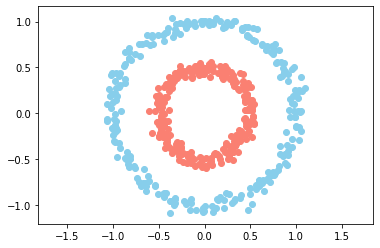

In [18]:
# Creating Dataset
n = 500  # Number of data rows
p = 2    # Number of characteristics that have each row

# X is referred to the two parameters that make the two circles
# Y is referred to the classes of each circle
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

print(Y.shape)

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")  #Printing first class (when Y == 0)
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")  #Printing second class (when Y == 1)

plt.axis("equal")
plt.show()

## 2. Creating the Neural Network Structure

Now we are going to create a class for the structure of a neural layer. This class will contain the number of connections that the neural layer has with the previous layer, the number of neurons of the actual layer and the activation function the layer will use.

In [19]:
# Neural Layer class
class neural_layer():
    
    def __init__(self, number_connections, number_neurons, act_func):
        
        self.act_func = act_func
        
        self.b = np.random.rand(1, number_neurons) * 2 - 1
        self.W = np.random.rand(number_connections, number_neurons) * 2 - 1
        

## 3. The Activation Function

The activation function is the one who receives the ponderated sum of the parameters (that is done inside the neuron) and then it introduces no-lineality to our neural network and thus it will help to connect more neurons having a no-linear result.

**The effect of the activation function is that it distorts the plane generated by the neuron.**

In this case, we're going to use the simoid function as our activation function.

The Sigmoid function is a type of activation function that turns all the received data into a range from 0 to 1 with a particular form of an "S".

![](https://i.imgur.com/ZWaUUDum.png)

In [20]:
# Activation Function (sigmoid) and its derivative
sigm = (
        lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x)
       )

## 4. Creating the neural network

In [30]:
def create_nn(topology, act_f):
    
    nn = []
    
    # Generating each layer and appending to the neural network
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn


topology = [p, 4, 8, 1]  # Topology of the neural network (two hidden layers an one as an output)
neural_net = create_nn(topology, sigm)

## 5. Training the Neural Network

To train our neural network we must to pass first random values to the parameters of each layer, make a foward pass with all the values of the data (X1, X2) and try to make a prediction (Yp), and then comparing that result with the real one (Yr).

Once we did that, we have to calculate the error with our cost function and then make the **_Backpropagation_** algorithm to calculate all the necessary derivatives of the cost function with each layer and finally make all the derivatives of the cost function with all the parameters (W) and with the baias term (b).

![](https://i.imgur.com/KQtPjoNl.png)

After we have calculated all the derivatives, we apply the **_Gradient Descent_** algorithm to recalculate all the parameters and bias terms of each layer.

![](https://i.imgur.com/uFfJtijm.png)

We have to do this process iteratively until we minimize our cost function :)

In [31]:
# Cost function and its derivative
l2_cost = (
            lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
            lambda Yp, Yr: (Yp - Yr) 
           )


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    
    # output = [(z0, a0), (z1, a1) ... ]
    # Creating an array that will contain the output of each layer of the nn. (The first layer we add is the one with the characteristics X1 and X2)
    output = [(None, X)]
    
    # Forward pass
    for l, layer in enumerate(neural_net):
        z = output[-1][1] @ neural_net[l].W + neural_net[l].b  # Making the ponderated sum with the output values of the last layer with the parameters of the next layer
        a = neural_net[l].act_func[0](z)  # Passing that ponderated sum to the activation function of the layer
        
        output.append((z, a))

    if train:
        # Backward pass
        deltas = []       # Array that will contain all the partial derivatives of each layer (delta)
        
        for l in reversed(range(0, len(neural_net))):
            z = output[l+1][0]  # We add 1 to the index because we have an extra layer, which is the characteristics "layer" [(None, X)...]
            a = output[l+1][1]
            
            if l == len(neural_net) - 1:
                # Calculating delta of last layer
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_func[1](a))

            else:
                # Calculating delta of previous layer
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_func[1](a))
            
            _W = neural_net[l].W
            
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - output[l][1].T @ deltas[0] * lr
            
    return output[-1][1]  # Returning the predicted value


## 6. Plotting the error and how the neural network classify the data

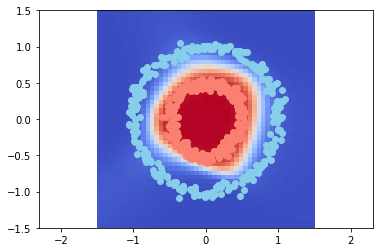

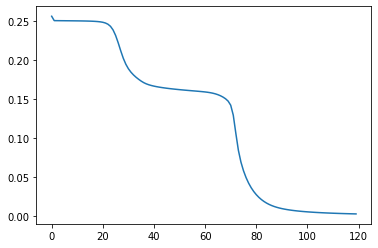

In [32]:
import time
from IPython.display import clear_output

# Saving different losses to see the improvement of the nn.
loss = []

for i in range(3000):
    # Training the Neural Network
    pY = train(neural_net, X, Y, l2_cost, lr=0.015)
    
    # After 25 iterations, show the error and the data classification plot
    if i % 25 == 0:
        loss.append(l2_cost[0](pY, Y))
        
        res = 50
        
        _x0 = np.linspace(-1.5, 1.5, res)  # Forms an array that goes from -1.5 to 1.5 with 50 values
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))
        
        # Drawing the two areas to classify the data points
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_net, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")  #Printing first class (when Y == 0)
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")  #Printing second class (when Y == 1)

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)